In [2]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *

sns.set_theme(style="whitegrid")

In [3]:
import_df=pandas.read_feather('reports/import_report10Jul.feather')
func_df=pandas.read_csv('reports/func_report9Jul.csv')

In [4]:
len(import_df.groupby(['Kernel']))

45147

In [5]:
len(func_df.groupby(['Kernel']))

45464

In [6]:
import_df.columns

Index(['index', 'numpy', 'pandas', 'subprocess', 'Kernel', 'matplotlib',
       'h5py', 'os', 'seaborn', 'skimage',
       ...
       'cassnet', 'net_soft_label', 'ipdb', 'normalise', 'randomde',
       'yahoofinancials', 'pymystem3', 'iso639', 'collection', 'dtale'],
      dtype='object', length=1278)

In [7]:
module_counts = import_df.drop(columns = ['Kernel']).sum().sort_values(ascending=False)

In [8]:
module_perc_series = (module_counts / len(import_df))*100

In [9]:
#

In [10]:
module_perc_series = module_perc_series.drop(['os', 'datetime', 'warnings', 're'])

In [11]:
top10ser=module_perc_series.head(10)

In [12]:
top10 = top10ser.reset_index(drop=False)

In [13]:
top10.columns = ['lib', 'perc']

In [14]:
top10 = top10.sort_values(by='perc', ascending=False)

In [15]:
plot_libs=(
        ggplot(top10, aes('lib', y='perc'))
        + geom_col(fill='#FFF2CC', color='black', size=0.4)
        + xlab("Python Library")
        + ylab("Usage in %")
        + scale_x_discrete(limits=top10['lib'][::-1])
        + coord_flip()
        + theme('light', figure_size=(10, 3.5))
)

In [16]:
top10

,lib,perc
0,pandas,98.544754
1,numpy,84.552683
2,matplotlib,67.136244
3,sklearn,53.790950
4,seaborn,39.832104
5,mpl_toolkits,16.302301
6,learntools,11.404966
7,plotly,9.342813
8,scipy,7.982812
9,tensorflow,6.385806


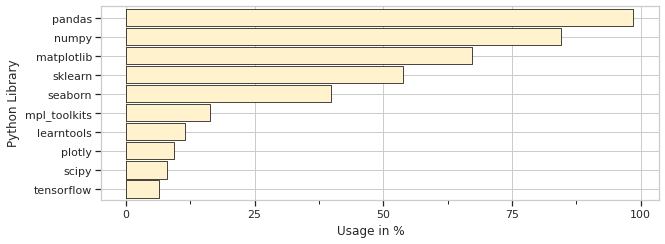

<ggplot: (88718053654)>

E:\ssdapps\anaconda\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 10 x 3.5 in image.
E:\ssdapps\anaconda\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: plots/plot_casestudy/libs.png


In [17]:
display(plot_libs)
plot_libs.save("plots/plot_casestudy/libs.png")

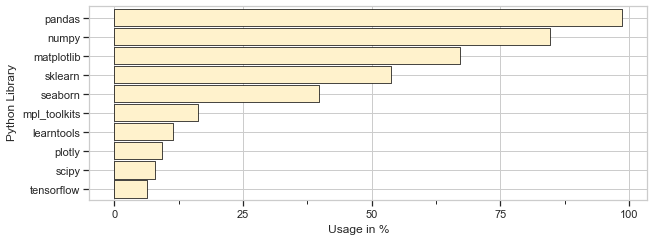

In [24]:
mat = plot_libs.draw()

In [25]:
import tikzplotlib
tikzplotlib.save('hi.tikz', figure=mat)

In [117]:
geom_col?

Init signature: geom_col(mapping=None, data=None, **kwargs)
Docstring:     
Bar plot with base on the x-axis

This is an alternate version of :class:`geom_bar` that maps
the height of bars to an existing variable in your data. If
you want the height of the bar to represent a count of cases,
use :class:`geom_bar`.


.. rubric:: Usage

::

    geom_col(mapping=None, data=None, stat='identity', position='stack',
             na_rm=False, inherit_aes=True, show_legend=None, raster=False,
             width=None, **kwargs)

Only the ``mapping`` and ``data`` can be positional, the rest must
be keyword arguments. ``**kwargs`` can be aesthetics (or parameters)
used by the ``stat``.


Parameters
----------
mapping : aes, optional
    Aesthetic mappings created with :meth:`~plotnine.aes`. If specified and :py:`inherit.aes=True`, it is combined with the default mapping for the plot. You must supply mapping if there is no plot mapping.
    
    ========= =========
    Aesthetic Default value
    =

ipynb to py conversion:
wrote 46479 to file
total=34445, successful=34418

calls counting: idx+1=46868, successful=45464

In [51]:
most_common = func_df.groupby('Function').sum().sort_values(by=['Counter'], ascending=False).reset_index()
most_common.head(15)

,Function,Counter
0,__getitem__,1533975
1,print,280993
2,head,103937
3,show,99426
4,len,96143
5,read_csv,78295
6,range,67002
7,figure,63641
8,plot,62419
9,title,61881


In [52]:
# plotting
exclude = ['pie', 'Bar', 'Scatter', 'Figure', 'figure', 'add_trace', 'matshow', 'iplot', 'grid', 'tick_bottom', 'add_subplot','boxplot', 'annotate','colorbar', 'distplot', 'bar', 'yticks', 'tight_layout', 'barplot', 'suptitle', 'gca', 'imshow', 'update_layout', 'hist', 'countplot', 'scatter', 'legend', 'xticks', 'xlabel', 'show', 'set_title', 'title', 'subplot', 'set_ylabel', 'set_xlabel', 'subplot', 'heatmap','subplots', 'histplot','plot','ylabel']
# python built-ins
exclude.extend(['filterwarnings', 'print', 'list', 'str', 'dict'])
# tutorial functions
exclude.extend(['solution', 'check', 'plotPerColumnDistribution', 'plotCorrelationMatrix', 'plotScatterMatrix'])
# ipython
exclude.extend(['display', 'get_ipython', 'run_line_magic'])
mc_trimmed = most_common[~most_common['Function'].isin(exclude)]
pandas.options.display.max_rows = 300
mc_trimmed.head(50)

#filter pandas
#

,Function,Counter
0,__getitem__,1533975
2,head,103937
4,len,96143
5,read_csv,78295
6,range,67002
10,sum,58868
11,append,56619
12,groupby,51653
13,fit,50483
14,value_counts,48920


join is the python builtin string join
compile is a tensorflow function
log is numpy logarithm function
classification_report is a scikitlearn function
reshape can be either numpy.reshape or tensorflow.reshape